## Initialize Libraries

In [1]:
# Machine Learning Methods
import tensorflow as tf
import xgboost as xgb # Extreme Gradient Boosting
import lightgbm as lgb # Light Gradient Boosting Machine
from catboost import CatBoostClassifier # CatBoost
from sklearn.ensemble import AdaBoostClassifier # AdaBoost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes

# Additional Libraries for Training and Testing
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Additional Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

# Additional Library for Porting to Microcontroller
from micromlgen import port
import os

print("Success")

Success


## Train Function

In [2]:
table = pd.read_csv('1_Percent_Data/1_Percent_Data.csv')

table_cleaned = table.drop(columns=['EMG_chest'])

x = table_cleaned.drop(columns=['StressLevel'])
y = table_cleaned['StressLevel']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42)

def train_model(model):
    # Train the model
    model.fit(x_train, y_train)

    # Predict on test data
    start_time = time.time()
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test) if hasattr(model, 'predict_proba') else None
    end_time = time.time()

    # Calculate results
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
    test_time = round(end_time - start_time, 3)

    # Print results
    print("Accuracy score of the model: ",accuracy)
    print("Precision score of the model:",precision)
    print("Recall score of the model: ",recall)
    print("F1 score of the model: ",f1)
    print("Time taken to test the model: ",test_time)

    return y_pred, y_prob, test_time

## Plot Function

In [3]:
# Normalized Confusion Matrix
def confusion_matrix_normalized(y_test, y_pred, model_name, save_path='plot'):
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_normalized = normalize(conf_matrix, axis=1, norm='l1')
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='.2f')
    plt.title(f'Normalized Confusion Matrix - {model_name}')
    
    filename = f'normalized_confusion_matrix_{model_name}.png'
    plt.savefig(os.path.join(save_path, filename))

    plt.show()

# Non-Normalized Confusion Matrix
def confusion_matrix_non_normalized(y_test, y_pred, model_name, save_path='plot'):
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Non-Normalized Confusion Matrix - {model_name}')
    
    filename = f'non_normalized_confusion_matrix_{model_name}.png'
    plt.savefig(os.path.join(save_path, filename))
    
    plt.show()

# ROC Curve
def plot_roc_curve(y_test, y_prob, model_name, save_path='plot', n_classes=None):
    if n_classes is None:
        n_classes = len(np.unique(y_test))

    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    if not os.path.exists(save_path):
        os.makedirs(save_path)
        
    colors = plt.get_cmap('tab10')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=1, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

    plt.plot(fpr["micro"], tpr["micro"], color='navy', lw=1, label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right', fontsize=8)

    filename = f'roc_curve_{model_name}.png'
    plt.savefig(os.path.join(save_path, filename))
    
    plt.show()

## Call Function

### Extreme Gradient Boosting (XGBoost)

Accuracy score of the model:  0.95
Precision score of the model: 0.95
Recall score of the model:  0.95
F1 score of the model:  0.95
Time taken to test the model:  0.46


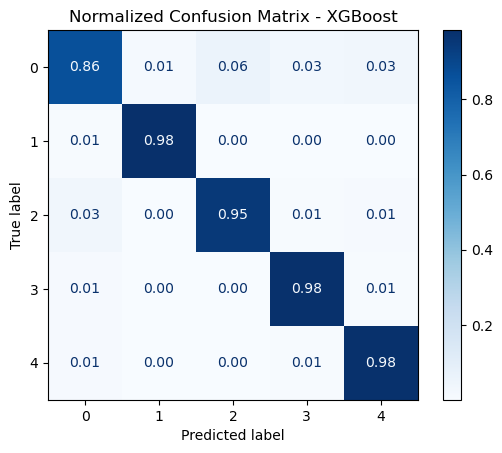

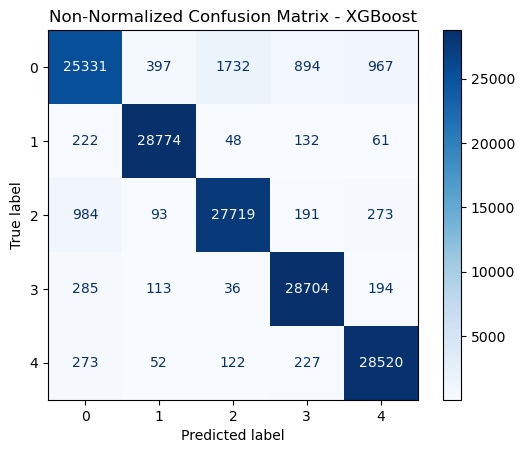

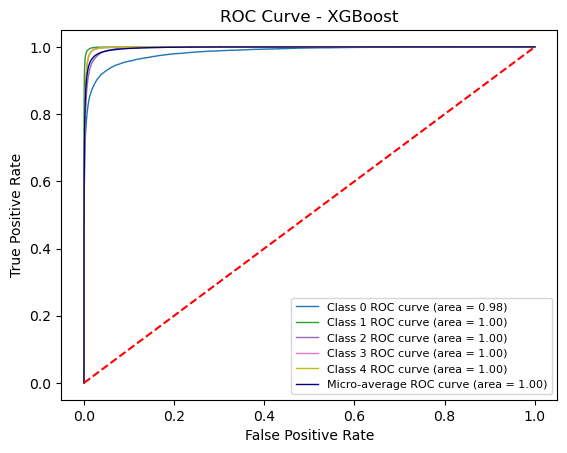

In [4]:
xgboost = xgb.XGBClassifier()
y_pred, y_prob, testing_time = train_model(xgboost)

model_name = 'XGBoost'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

In [5]:
temp_model = "temp_model"
if not os.path.exists(temp_model):
    os.makedirs(temp_model)
    
model_header = "model_header"
if not os.path.exists(model_header):
    os.makedirs(model_header)

convert = port(xgboost, tmp_file=os.path.join(temp_model, 'temp_model.json'))
with open(os.path.join(model_header, 'xgboost_model.h'), 'w') as f:
    f.write(convert)
print("Success")

Success


### Random Forest

Accuracy score of the model:  0.968
Precision score of the model: 0.968
Recall score of the model:  0.968
F1 score of the model:  0.968
Time taken to test the model:  9.068


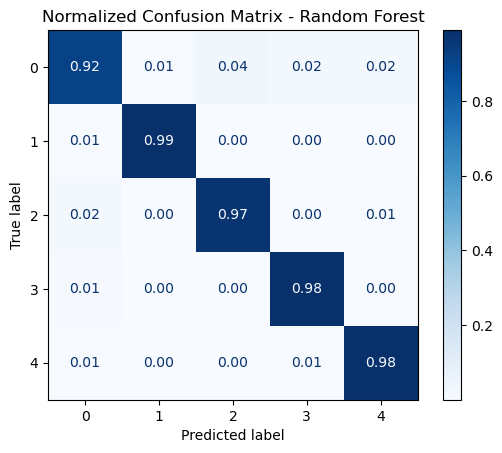

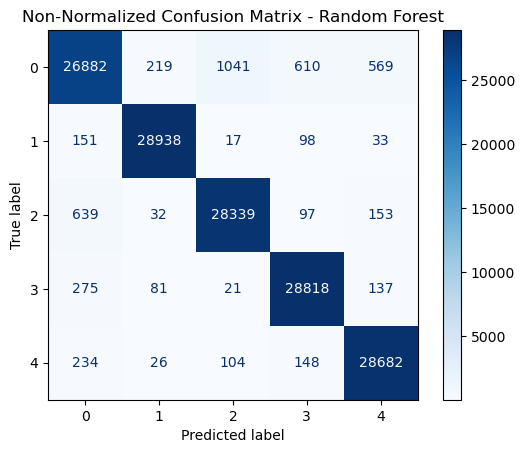

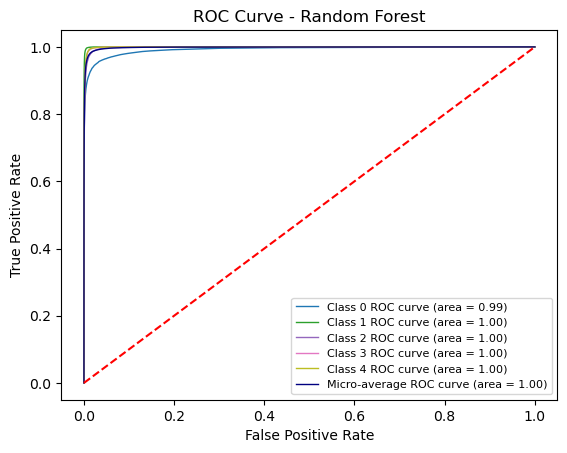

In [6]:
randomforest = RandomForestClassifier()
y_pred, y_prob, testing_time = train_model(randomforest)

model_name = 'Random Forest'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

In [7]:
temp_model = "temp_model"
if not os.path.exists(temp_model):
    os.makedirs(temp_model)
    
model_header = "model_header"
if not os.path.exists(model_header):
    os.makedirs(model_header)

convert = port(randomforest, tmp_file=os.path.join(temp_model, 'temp_model.json'))
with open(os.path.join(model_header, 'randomForest_model.h'), 'w') as f:
    f.write(convert)
print("Success")

Success


### Decision Tree

Accuracy score of the model:  0.951
Precision score of the model: 0.951
Recall score of the model:  0.951
F1 score of the model:  0.951
Time taken to test the model:  0.095


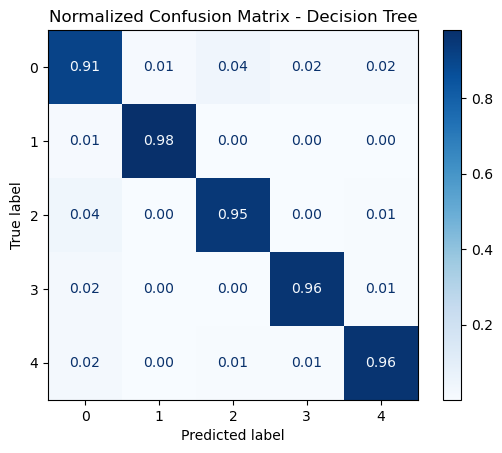

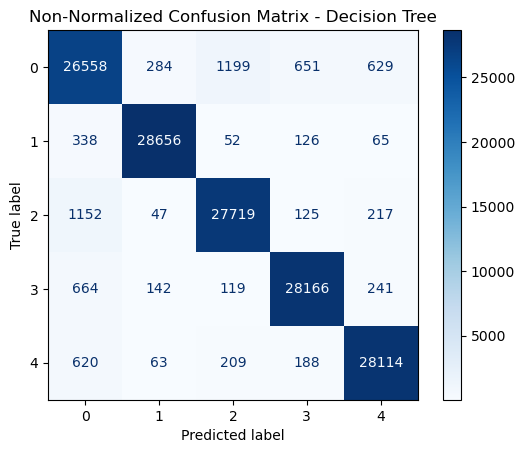

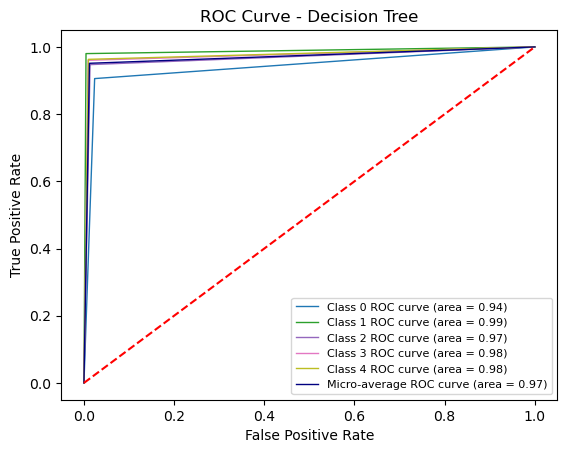

In [8]:
decisiontree = DecisionTreeClassifier()
y_pred, y_prob, testing_time = train_model(decisiontree)

model_name = 'Decision Tree'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

In [9]:
temp_model = "temp_model"
if not os.path.exists(temp_model):
    os.makedirs(temp_model)
    
model_header = "model_header"
if not os.path.exists(model_header):
    os.makedirs(model_header)

convert = port(decisiontree, tmp_file=os.path.join(temp_model, 'temp_model.json'))
with open(os.path.join(model_header, 'decisionTree_model.h'), 'w') as f:
    f.write(convert)
print("Success")

Success


### Logistic Regression

C:\Users\lab41\anaconda3\envs\stress_detection\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of the model:  0.284
Precision score of the model: 0.283
Recall score of the model:  0.284
F1 score of the model:  0.273
Time taken to test the model:  0.052


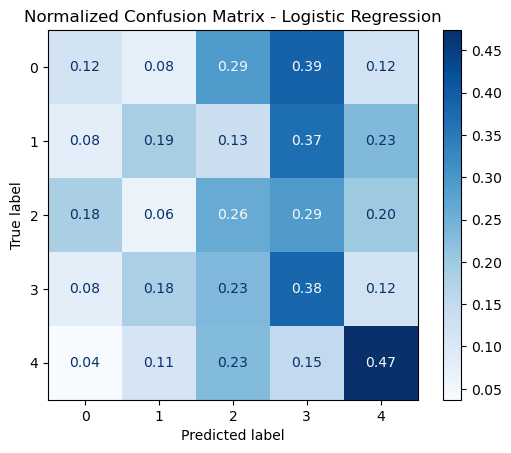

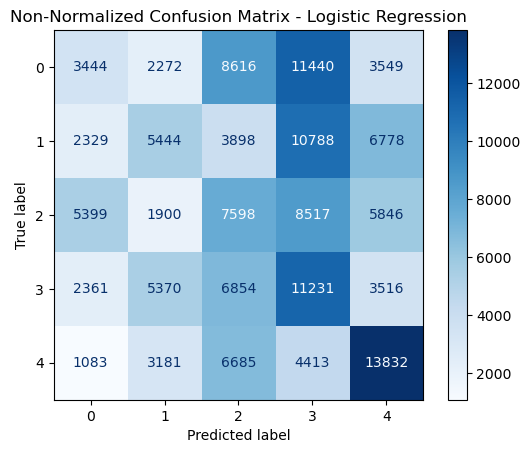

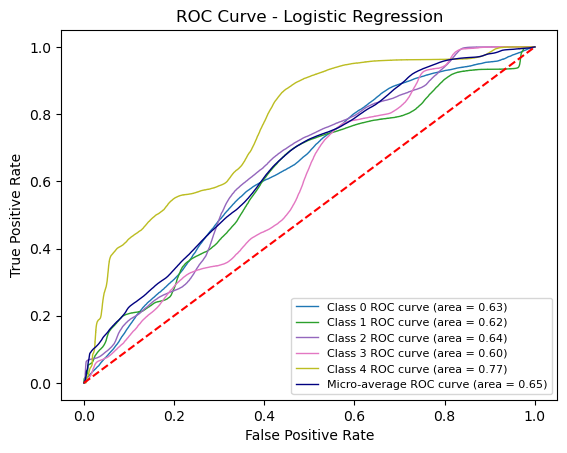

In [10]:
logisticregression = LogisticRegression()
y_pred, y_prob, testing_time = train_model(logisticregression)

model_name = 'Logistic Regression'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

In [11]:
temp_model = "temp_model"
if not os.path.exists(temp_model):
    os.makedirs(temp_model)
    
model_header = "model_header"
if not os.path.exists(model_header):
    os.makedirs(model_header)

convert = port(logisticregression, tmp_file=os.path.join(temp_model, 'temp_model.json'))
with open(os.path.join(model_header, 'logisticRegression_model.h'), 'w') as f:
    f.write(convert)
print("Success")

Success


### Gaussian Naive Bayes (GaussianNB)

Accuracy score of the model:  0.296
Precision score of the model: 0.32
Recall score of the model:  0.296
F1 score of the model:  0.272
Time taken to test the model:  0.105


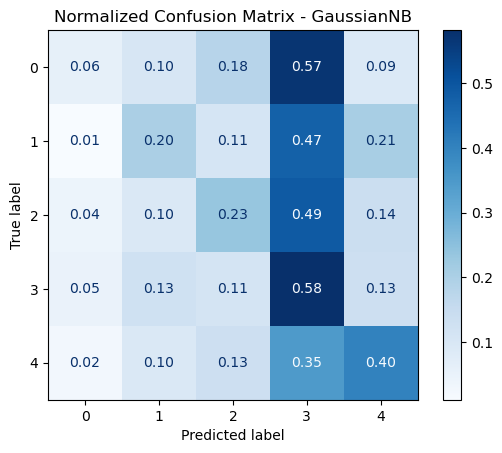

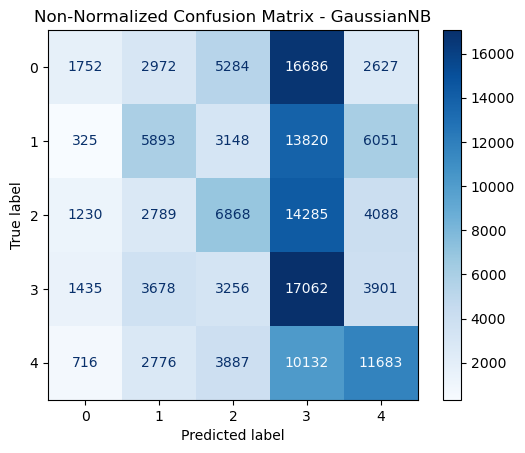

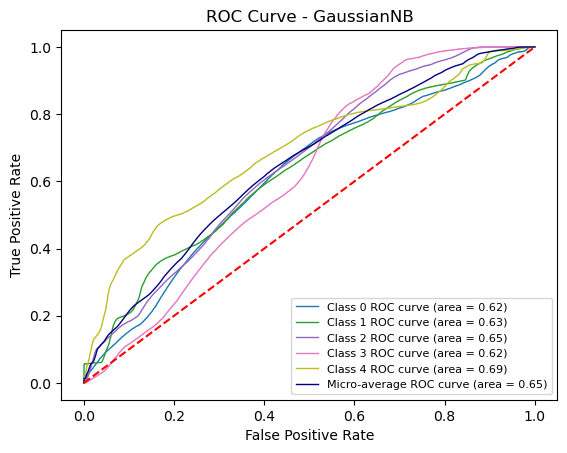

In [12]:
gaussiannb = GaussianNB()
y_pred, y_prob, testing_time = train_model(gaussiannb)

model_name = 'GaussianNB'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### CatBoost

Learning rate set to 0.111475
0:	learn: 1.5200475	total: 323ms	remaining: 5m 23s
1:	learn: 1.4477944	total: 506ms	remaining: 4m 12s
2:	learn: 1.3927994	total: 679ms	remaining: 3m 45s
3:	learn: 1.3401158	total: 869ms	remaining: 3m 36s
4:	learn: 1.2965476	total: 1.06s	remaining: 3m 30s
5:	learn: 1.2582874	total: 1.23s	remaining: 3m 23s
6:	learn: 1.2282068	total: 1.39s	remaining: 3m 17s
7:	learn: 1.1964385	total: 1.56s	remaining: 3m 13s
8:	learn: 1.1626205	total: 1.75s	remaining: 3m 12s
9:	learn: 1.1433069	total: 1.9s	remaining: 3m 8s
10:	learn: 1.1126392	total: 2.08s	remaining: 3m 7s
11:	learn: 1.0858236	total: 2.26s	remaining: 3m 5s
12:	learn: 1.0701730	total: 2.42s	remaining: 3m 3s
13:	learn: 1.0548721	total: 2.58s	remaining: 3m 1s
14:	learn: 1.0303692	total: 2.76s	remaining: 3m 1s
15:	learn: 1.0110348	total: 2.94s	remaining: 3m
16:	learn: 0.9898836	total: 3.12s	remaining: 3m
17:	learn: 0.9741469	total: 3.28s	remaining: 2m 59s
18:	learn: 0.9590849	total: 3.45s	remaining: 2m 58s
19:	lea

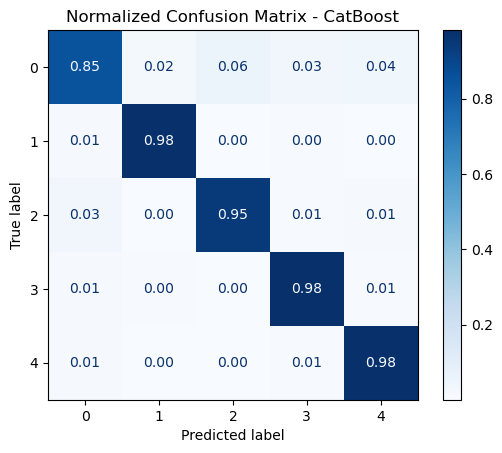

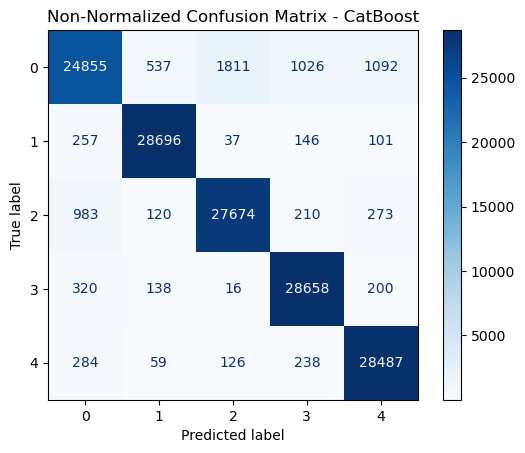

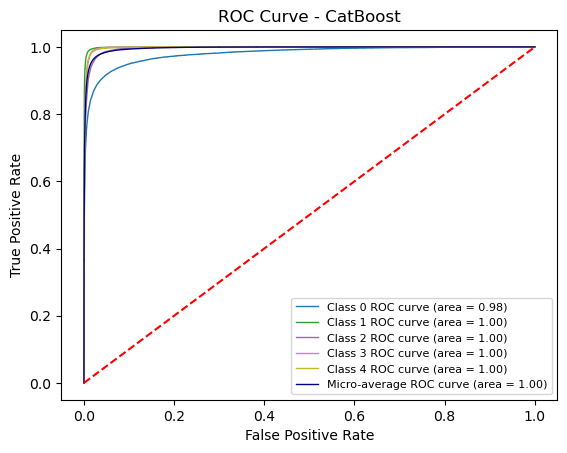

In [13]:
catboost = CatBoostClassifier()
y_pred, y_prob, testing_time = train_model(catboost)

model_name = 'CatBoost'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### Adaptive Boosting (AdaBoost)

C:\Users\lab41\anaconda3\envs\stress_detection\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score of the model:  0.451
Precision score of the model: 0.448
Recall score of the model:  0.451
F1 score of the model:  0.444
Time taken to test the model:  2.305


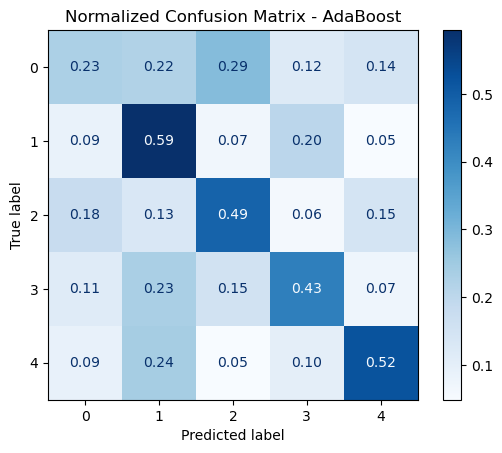

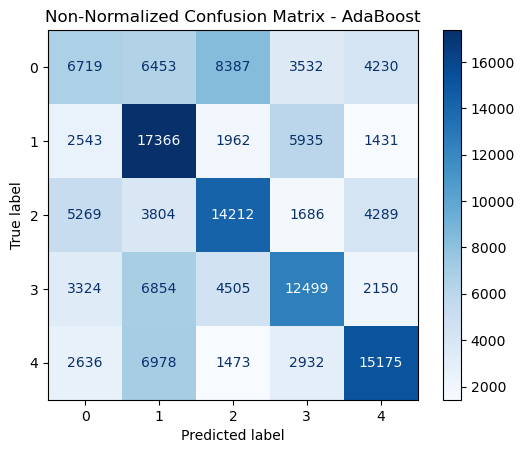

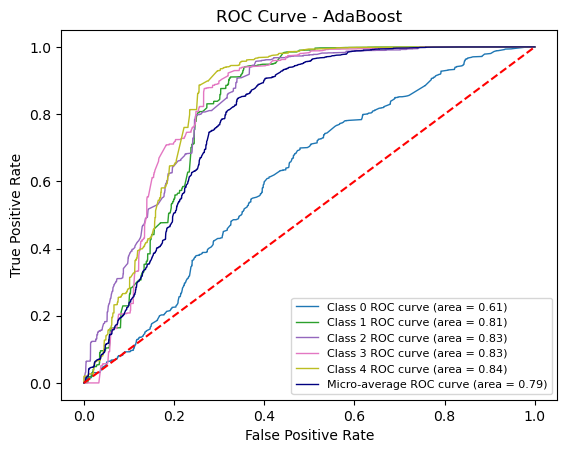

In [14]:
adaboost = AdaBoostClassifier()
y_pred, y_prob, testing_time = train_model(adaboost)

model_name = 'AdaBoost'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### Light Gradient Boosting Machine (LightGBM)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 829281, number of used features: 5
[LightGBM] [Info] Start training from score -1.609753
[LightGBM] [Info] Start training from score -1.609246
[LightGBM] [Info] Start training from score -1.609385
[LightGBM] [Info] Start training from score -1.609819
[LightGBM] [Info] Start training from score -1.608987
Accuracy score of the model:  0.941
Precision score of the model: 0.941
Recall score of the model:  0.941
F1 score of the model:  0.94
Time taken to test the model:  2.144


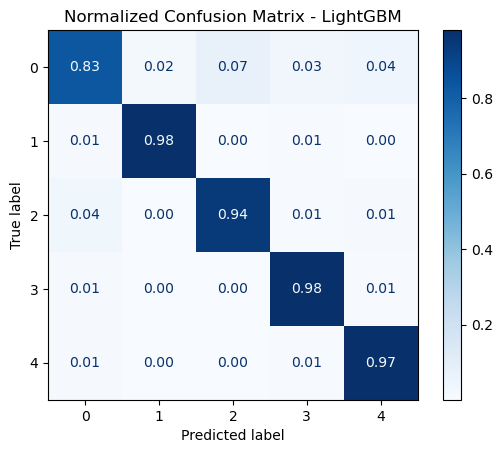

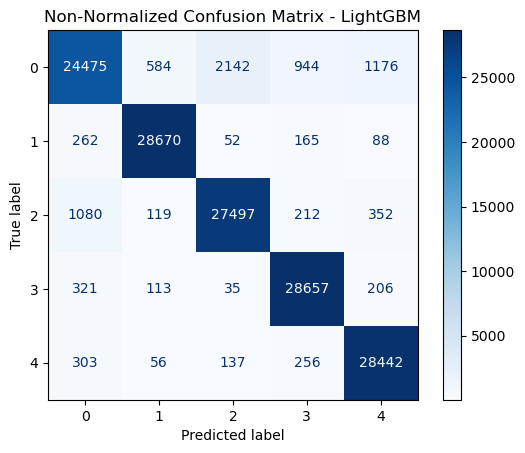

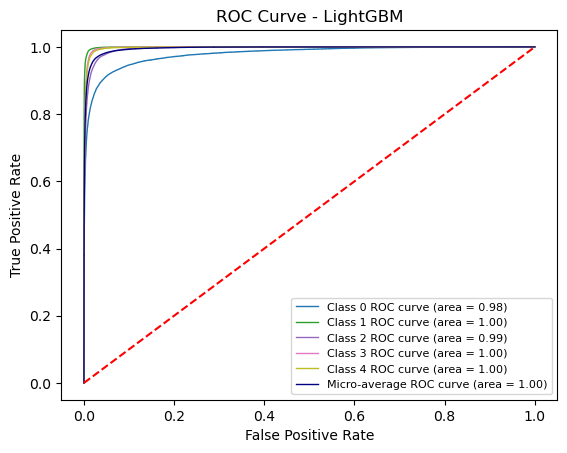

In [15]:
lightGBM = lgb.LGBMClassifier()
y_pred, y_prob, testing_time = train_model(lightGBM)

model_name = 'LightGBM'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### Gradient Boosting Classifier

Accuracy score of the model:  0.844
Precision score of the model: 0.843
Recall score of the model:  0.844
F1 score of the model:  0.838
Time taken to test the model:  2.579


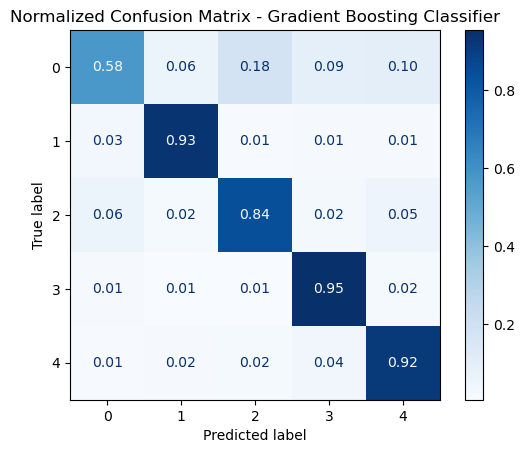

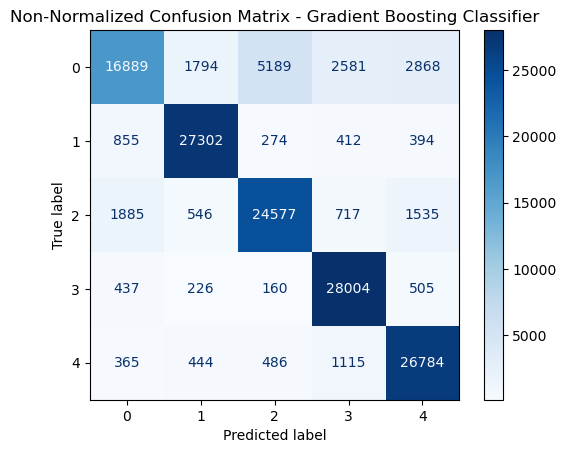

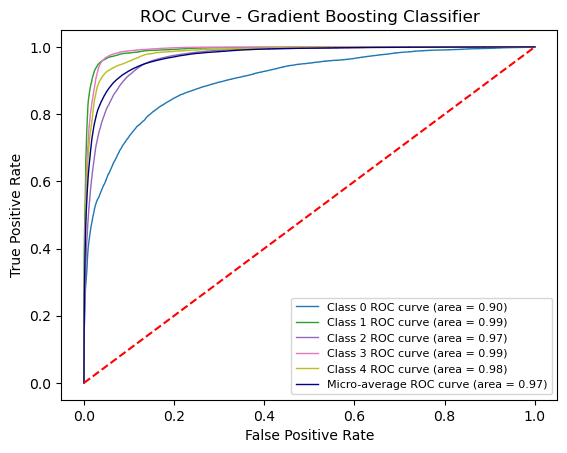

In [16]:
gradientboosting = GradientBoostingClassifier()
y_pred, y_prob, testing_time = train_model(gradientboosting)

model_name = 'Gradient Boosting Classifier'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### K-Nearest Neighbors (KNN)

Accuracy score of the model:  0.89
Precision score of the model: 0.89
Recall score of the model:  0.89
F1 score of the model:  0.888
Time taken to test the model:  16.322


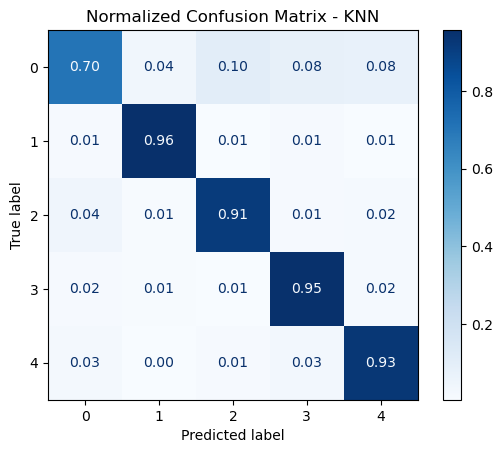

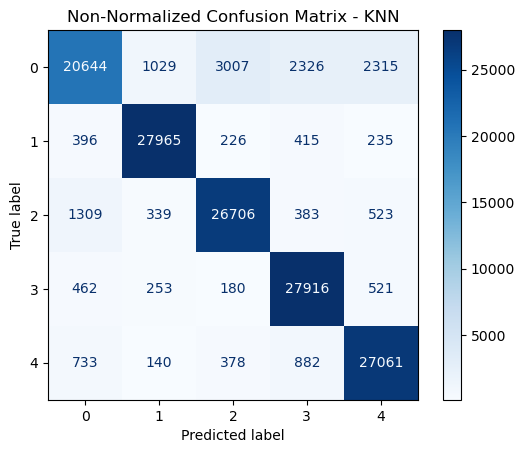

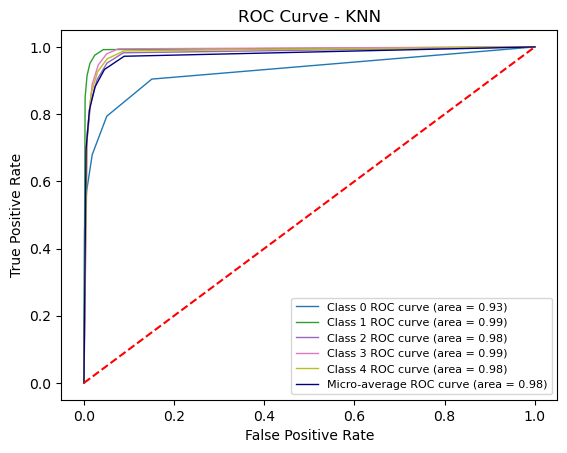

In [17]:
knn = KNeighborsClassifier()
y_pred, y_prob, testing_time = train_model(knn)

model_name = 'KNN'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### Multilayer Perceptron (MLP)

C:\Users\lab41\anaconda3\envs\stress_detection\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score of the model:  0.739
Precision score of the model: 0.729
Recall score of the model:  0.739
F1 score of the model:  0.727
Time taken to test the model:  0.224


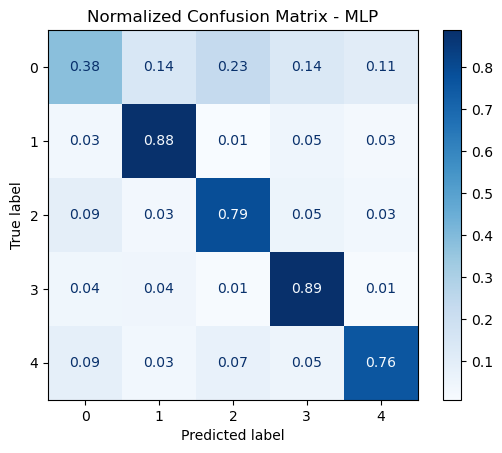

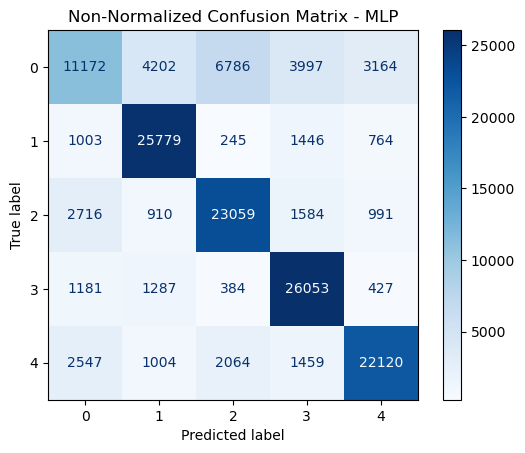

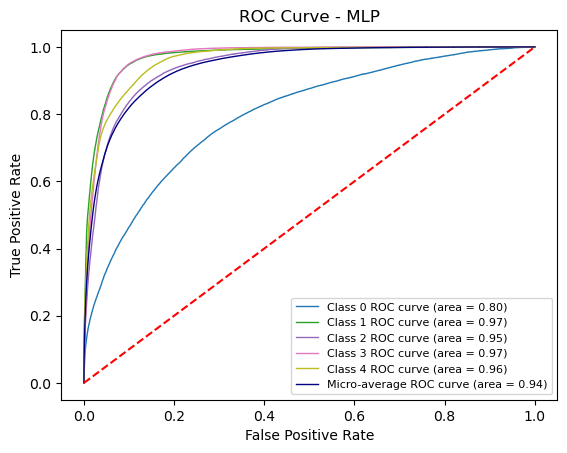

In [18]:
mlp = MLPClassifier()
y_pred, y_prob, testing_time = train_model(mlp)

model_name = 'MLP'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))

### Tensorflow FNN

In [19]:
table = pd.read_csv('1_Percent_Data/1_Percent_Data.csv')

table_cleaned = table.drop(columns=['EMG_chest'])

x = table.drop(columns=['StressLevel'])
y = table['StressLevel']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42)

def tensorflow():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Predict on test data
    start_time = time.time()
    y_prob = model.predict(x_test)
    y_pred = np.argmax(y_prob, axis=1)
    end_time = time.time()

    # Calculate results
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
    test_time = round(end_time - start_time, 3)

    # Print results
    print("Accuracy score of the model: ", accuracy)
    print("Precision score of the model:", precision)
    print("Recall score of the model: ", recall)
    print("F1 score of the model: ", f1)
    print("Time taken to test the model: ", test_time)

    return y_pred, y_prob, test_time

In [20]:
# Normalized Confusion Matrix
def confusion_matrix_normalized(y_test, y_pred, model_name, save_path='plot'):
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_normalized = normalize(conf_matrix, axis=1, norm='l1')
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='.2f')
    plt.title(f'Normalized Confusion Matrix - {model_name}')
    
    filename = f'normalized_confusion_matrix_{model_name}.png'
    plt.savefig(os.path.join(save_path, filename))

    plt.show()

# Non-Normalized Confusion Matrix
def confusion_matrix_non_normalized(y_test, y_pred, model_name, save_path='plot'):
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Non-Normalized Confusion Matrix - {model_name}')
    
    filename = f'non_normalized_confusion_matrix_{model_name}.png'
    plt.savefig(os.path.join(save_path, filename))
    
    plt.show()

# ROC Curve
def plot_roc_curve(y_test, y_prob, model_name, save_path='plot', n_classes=None):
    if n_classes is None:
        n_classes = len(np.unique(y_test))

    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    if not os.path.exists(save_path):
        os.makedirs(save_path)
        
    colors = plt.get_cmap('tab10')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=1, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

    plt.plot(fpr["micro"], tpr["micro"], color='navy', lw=1, label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right', fontsize=8)

    filename = f'roc_curve_{model_name}.png'
    plt.savefig(os.path.join(save_path, filename))
    
    plt.show()

4574/4574 [==============================] - 6s 1ms/step
Accuracy score of the model:  0.925
Precision score of the model: 0.925
Recall score of the model:  0.925
F1 score of the model:  0.924
Time taken to test the model:  8.752


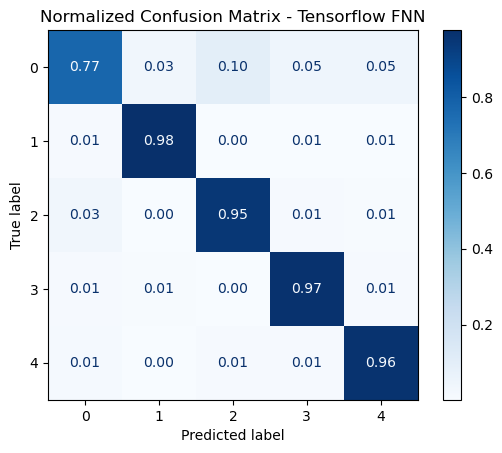

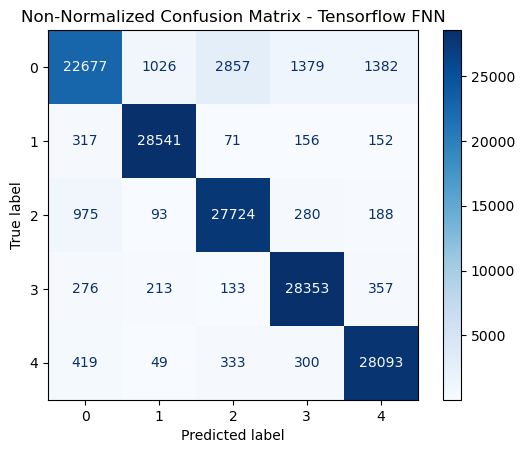

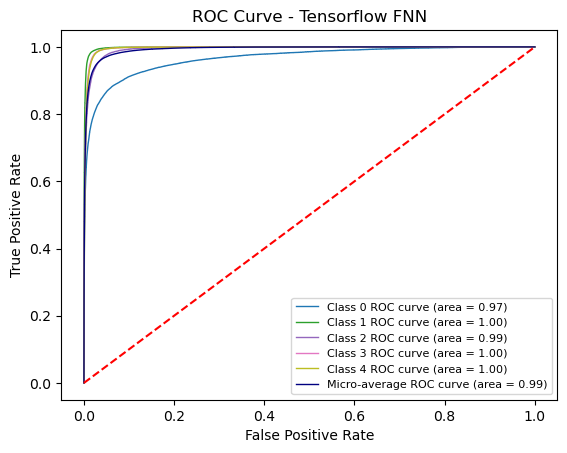

In [21]:
y_pred, y_prob, testing_time = tensorflow()

model_name = 'Tensorflow FNN'
confusion_matrix_normalized(y_test, y_pred, model_name)
confusion_matrix_non_normalized(y_test, y_pred, model_name)
plot_roc_curve(y_test, y_prob, model_name, n_classes=len(np.unique(y_test)))